In [1]:
import numpy as np
import matplotlib.pyplot as plt
from load_data import load_random_regression_dataset

In [2]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = load_random_regression_dataset(120, 1, 3.5, noise=2.5)
train_labels = train_labels ** 2
val_labels = val_labels ** 2
test_labels = test_labels ** 2
data_min = np.min([np.min(train_data), np.min(val_data), np.min(test_data)])
data_max = np.max([np.max(train_data), np.max(val_data), np.max(test_data)])

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [4]:
degree = 10
poly_features = PolynomialFeatures(degree=degree, include_bias=True)
train_data_poly = poly_features.fit_transform(train_data)
val_data_poly = poly_features.fit_transform(val_data)
test_data_poly = poly_features.fit_transform(test_data)

In [5]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(train_data_poly, train_labels)

LinearRegression(fit_intercept=False)

In [6]:
print(r2_score(linreg.predict(train_data_poly), train_labels))
print(r2_score(linreg.predict(val_data_poly), val_labels))
print(r2_score(linreg.predict(test_data_poly), test_labels))

0.9937328632405127
0.9824837916325647
0.8847466705886476


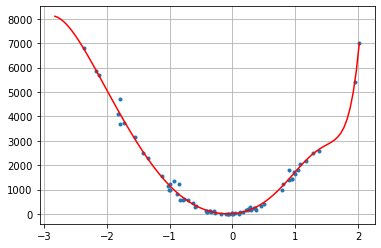

In [7]:
linspace = np.linspace(data_min, data_max, num=100).reshape(-1, 1)
linspace_poly = poly_features.fit_transform(linspace)
plt.plot(train_data, train_labels, '.')
plt.plot(linspace, linreg.predict(linspace_poly), 'r')
plt.grid()
plt.show()

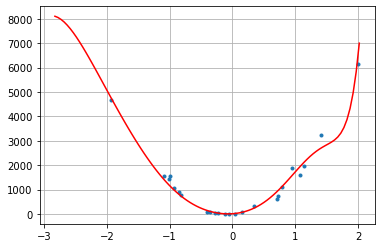

In [8]:
linspace = np.linspace(data_min, data_max, num=100).reshape(-1, 1)
linspace_poly = poly_features.fit_transform(linspace)
plt.plot(val_data, val_labels, '.')
plt.plot(linspace, linreg.predict(linspace_poly), 'r')
plt.grid()
plt.show()

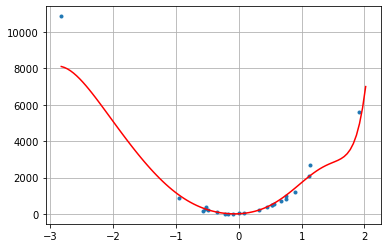

In [9]:
linspace = np.linspace(data_min, data_max, num=100).reshape(-1, 1)
linspace_poly = poly_features.fit_transform(linspace)
plt.plot(test_data, test_labels, '.')
plt.plot(linspace, linreg.predict(linspace_poly), 'r')
plt.grid()
plt.show()